In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df= df[df['ImagingRegion'].str.match('CA1')|df['ImagingRegion'].str.match('')]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [3]:
morph_rare = ['4139265.3','4139265.4','4139265.5','4222168.2'] #,'4139266.3']#,'4222175.0']
morph_familiar = ['4222153.2','4222153.3','4222153.1','4222174.1','4222154.1']#,'4222157.3']

In [4]:
def U_dict_maker(mlist,first_sess=5,norm = True):
    U_dict = {}
    U_dict['all']={}
    
    firstSess = u._first_sess_gen(mlist,first_sess)
    
    for m,(mouse,f_ind) in enumerate(zip(mlist,firstSess)):
        U_dict[mouse]={}
        df_mouse = df[df['MouseName'].str.match(mouse)]
          # for each session
       
        morphs = [0,.25,.5,.75,1]
        for i in morphs:
            for j in morphs:
                U_dict[mouse][(i,j)]=[]
                if m == 0:
                    U_dict['all'][(i,j)]=[]
                
        for mat_ind,sess_ind in enumerate(np.arange(f_ind,df_mouse.shape[0])):
            print("session ind",sess_ind)
            sess = df_mouse.iloc[sess_ind]
             # load session 
            VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
            trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
            
            S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,
                                                                                      bin_size=10,speed=VRDat['speed']._values)
        
             # calculate trial x trial similarity
            S_tm = S_trial_mat.reshape([S_trial_mat.shape[0],-1])
            S_tm/=np.linalg.norm(S_tm,ord=2,axis=1)[:,np.newaxis]
            SM=np.matmul(S_tm,S_tm.T)
            SM[np.diag_indices(S_tm.shape[0])]=np.nan
            if norm:
#                 SM-=np.nanmean(SM.ravel())
                SM-=np.nanmin(SM.ravel())
                SM/=(np.nanmax(SM.ravel())-np.nanmin(SM.ravel()))
        
             # append data for each morph bin comparison
            for i in morphs:
                for j in morphs:
                    tmp = SM[trial_info['morphs']==i ,:]
                    tmp = tmp[:,trial_info['morphs']==j]
                    U_dict[mouse][(i,j)].append(np.nanmean(tmp.ravel()))
                    U_dict['all'][(i,j)].append(np.nanmean(tmp.ravel()))
#                     U_dict[mouse][(i,j)].extend(tmp.ravel().tolist())
#                     U_dict['all'][(i,j)].extend(tmp.ravel().tolist())
                    
    return U_dict
      
        
        
        
        
       
        
        
def perm_meandiff_test(arr0,arr1,nperms = 10000):
    arr0,arr1 = np.array(arr0),np.array(arr1)
    arr0,arr1=arr0[~np.isnan(arr0)],arr1[~np.isnan(arr1)]
    

    split_ind = arr0.shape[0]
    arr_c = np.concatenate((arr0,arr1))
    
    true_diff = np.mean(arr1)-np.mean(arr0)
    
    null_diff = np.zeros([nperms,])
    for p in range(nperms):
        np.random.shuffle(arr_c)
        null_diff[p]=np.mean(arr_c[:split_ind]) - np.mean(arr_c[split_ind:])
        
    return (np.abs(true_diff)<np.abs(null_diff)).sum()/nperms, true_diff




In [5]:
U_rare = U_dict_maker(morph_rare,norm=False,first_sess=[5,5,5,3])

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
(115307,) (115307, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
(109003,) (109003, 21)
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
(126969,) (126969, 21)
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
(110218,) (110218, 21)
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
(105022,) (105022, 21)
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
(102093,) (102093, 21)
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
(95160,) (95160, 21)
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
(102131,) (102131, 21)
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
(105228,) (105228, 21)
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
(100982,) (100982, 21)
frame diff 0
session ind 10
num aberrant ttls 0.0

In [7]:
U_fam = U_dict_maker(morph_familiar,norm=False,first_sess=4)

session ind 4
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
(116195,) (116195, 21)
frame diff 0
session ind 5
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
(121243,) (121243, 21)
frame diff 0
session ind 6
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
(129389,) (129389, 21)
frame diff 0
session ind 7
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
(121463,) (121463, 21)
frame diff 0
session ind 4
num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
(72892,) (72892, 21)
frame diff 0
session ind 5
num aberrant ttls 0.0
13661 (13661,) (13661, 21) 44097
(44097,) (44097, 21)
frame diff 0
session ind 4
num aberrant ttls 0.0
36036 (36036,) (36036, 21) 118455
(118455,) (118455, 21)
frame diff 0
session ind 5
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
(111444,) (111444, 21)
frame diff 0
session ind 6
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
(118959,) (118959, 21)
frame diff 0
session ind 4
num aberrant ttls 0.0
29526 (29526,) (

In [9]:
U_rare_n = U_dict_maker(morph_rare,norm=True,first_sess=[5,5,5,3])
U_fam_n = U_dict_maker(morph_familiar,norm=True,first_sess=4)

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
(115307,) (115307, 21)
frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
(109003,) (109003, 21)
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
(126969,) (126969, 21)
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
(110218,) (110218, 21)
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
(105022,) (105022, 21)
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
(102093,) (102093, 21)
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
(95160,) (95160, 21)
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
(102131,) (102131, 21)
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
(105228,) (105228, 21)
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,

In [ ]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]

df = df[(df['ImagingRegion']=="CA1")|(df['ImagingRegion']=="")]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]

U_fd = U_dict_maker(['4222157.4'],norm=False,first_sess=0)

In [11]:
morphs = [0,.25,.5,.75,1]
pmat = np.ones((len(morphs),len(morphs)))
Dmat = np.ones((len(morphs),len(morphs)))
for row,i in enumerate(morphs):
    for col,j in enumerate(morphs):
        print(row,col)
        p,d = perm_meandiff_test(U_rare['all'][(i,j)],U_fam['all'][(i,j)])
        print(p,d)
        pmat[row,col],Dmat[row,col]=p,d



pmat_n = np.ones((len(morphs),len(morphs)))
Dmat_n = np.ones((len(morphs),len(morphs)))
for row,i in enumerate(morphs):
    for col,j in enumerate(morphs):
        print(row,col)
        p,d = perm_meandiff_test(U_rare_n['all'][(i,j)],U_fam_n['all'][(i,j)])
        print(p,d)
        pmat_n[row,col],Dmat_n[row,col]=p,d

0 0
0.5889 -0.006598233361856276
0 1
0.8089 -0.002540308749107753
0 2
0.0005 0.02972479101364983
0 3
0.0008 0.02946026032781797
0 4
0.0004 0.02862413895148752
1 0
0.8062 -0.002540308749107753
1 1
0.8822 -0.001801992603633118
1 2
0.0016 0.03297434119131548
1 3
0.0036 0.03315457993049818
1 4
0.0022 0.03243378335452399
2 0
0.0003 0.02972479101364983
2 1
0.0023 0.03297434119131547
2 2
0.8419 0.0027582001294905456
2 3
0.87 0.002468107880304743
2 4
0.9223 0.001439400606052632
3 0
0.0006 0.02946026032781797
3 1
0.0026 0.033154579930498196
3 2
0.8632 0.002468107880304743
3 3
0.8932 -0.002236001890833561
3 4
0.9483 -0.0010221912690602797
4 0
0.0008 0.02862413895148752
4 1
0.0039 0.032433783354524015
4 2
0.9235 0.001439400606052632
4 3
0.9481 -0.0010221912690602797
4 4
0.9651 -0.0006637708642187323
0 0
0.0 -0.10401172461462027
0 1
0.0 -0.08259974736527698
0 2
0.0 0.04245551359419533
0 3
0.0001 0.0420129547919994
0 4
0.0 0.038005802382646336
1 0
0.0 -0.08259974736527709
1 1
0.0001 -0.080685726700

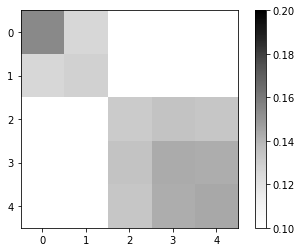

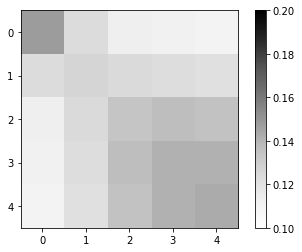

In [12]:
U_mean_rare = np.zeros([5,5])
U_mean_fam = np.zeros([5,5])
for row,i in enumerate(morphs):
    for col,j in enumerate(morphs):
        U_mean_rare[row,col] = np.nanmean(U_rare['all'][(i,j)])
        U_mean_fam[row,col]= np.nanmean(U_fam['all'][(i,j)])
        

f,ax = plt.subplots()
im = ax.imshow(U_mean_rare,cmap='Greys',vmin=0.1,vmax=.2)
f.colorbar(im)
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\U_mean_rare.pdf",format='pdf')
f,ax = plt.subplots()
im = ax.imshow(U_mean_fam,cmap='Greys',vmin=0.1,vmax=.2)
f.colorbar(im)
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\U_mean_fam.pdf",format='pdf')

[[5.889e-01 8.089e-01 5.000e-04 8.000e-04 4.000e-04]
 [8.062e-01 8.822e-01 1.600e-03 3.600e-03 2.200e-03]
 [3.000e-04 2.300e-03 8.419e-01 8.700e-01 9.223e-01]
 [6.000e-04 2.600e-03 8.632e-01 8.932e-01 9.483e-01]
 [8.000e-04 3.900e-03 9.235e-01 9.481e-01 9.651e-01]]


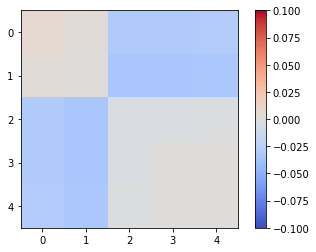

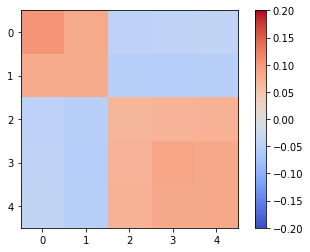

In [18]:
print(pmat)
f,ax = plt.subplots()
tmp = np.copy(Dmat)
mask = pmat>.05/10
tmp[mask]=np.nan
im = ax.imshow(-Dmat,cmap='coolwarm',vmin=-.1,vmax=.1)
# tmp[mask]=np.nan
# ax.imshow(-tmp,cmap='Greys',)
f.colorbar(im)
# ax.text(-.1,-.1,'*')
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\U_diff.pdf",format='pdf')

f,ax = plt.subplots()
tmp = np.copy(Dmat_n)
mask = pmat_n>.05/10
# tmp[mask]=np.nan
im = ax.imshow(-Dmat_n,cmap='coolwarm',vmin=-.2,vmax=.2)
tmp[mask]=np.nan
# ax.imshow(-tmp,cmap='Greys',)
f.colorbar(im)
# ax.text(-.1,-.1,'*')
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\U_diff_n.pdf",format='pdf')